# Clustering et word2vec 

### Imports

In [ ]:
#Pour les modules non installés :
pip install pandas
pip install scikit-learn
pip install gensim
pip install unidecode

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Imen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

### Effectuer un clustering des bulletins de la décennie 1960 et l'adaptation du nombre de clusters désirés

In [4]:
# Choisir la décennie 1960 et le nombre de clusters
DECADE = '1960'
N_CLUSTERS = 3

### Charger tous les fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:10]

['KB_JB838_1960-01-10_01-00018.txt',
 'KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-21_01-00014.txt',
 'KB_JB838_1960-01-22_01-00015.txt',
 'KB_JB838_1960-01-27_01-00006.txt',
 'KB_JB838_1960-01-28_01-00011.txt',
 'KB_JB838_1960-01-28_01-00021.txt',
 'KB_JB838_1960-01-30_01-00007.txt',
 'KB_JB838_1960-01-31_01-00024.txt']

In [7]:
texts = [open(data_path + f, encoding="utf-8").read() for f in files]


In [8]:
# Exemple de textes
texts[0][:400]

"ia« le som ÏJsIne MéuhMrïiqii S.AT'BBirîï^^ J00, r. Merlu» Duché, Vllvorde ch. STENO-DACTYLO élément de let ordre, bilingue, bon- i ne rémunération. Situation d’avenir, i Candidat, A soumet par écrit 130221H PORTANTE 80C.BRUXELL0I8I cherche pour entrée Immédiate Secrétaire Sténo-Dactylo 3 françalee - 1 an d'expérience, al tuât h «table - semaine de 5 Jours. Ecrire é cur. vit et prêt Ag. Rossel 029"

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\Imen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: total: 1min 36s
Wall time: 1min 36s


In [12]:
# Détail de la matrice
tfidf_vectors

<1000x2998 sparse matrix of type '<class 'numpy.float64'>'
	with 591558 stored elements in Compressed Sparse Row format>

In [13]:
locavectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Imprimer le vecteur tf-IDF du premier document

In [14]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

rossel        0.429849
ecrire        0.290763
agence        0.287302
bilingue      0.195620
importante    0.172368
                ...   
envoyé        0.000000
er            0.000000
erreurs       0.000000
esp           0.000000
♦             0.000000
Length: 2998, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [15]:
cosine([1, 2, 3], [1, 2, 3])

0

In [16]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [17]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [18]:
tfidf_array = tfidf_vectors.toarray()

In [19]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.        , 0.01044745, ..., 0.01088908, 0.01243897,
       0.        ])

In [21]:
cosine(tfidf_array[0], tfidf_array[1])

0.9628761011759681

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [22]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [23]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [24]:
clusters = km_model.fit_predict(tfidf_vectors)

c:\Users\Imen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [26]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-02-26_01-00011.txt',
     'KB_JB838_1960-07-13_01-00006.txt',
     'KB_JB838_1960-07-26_01-00004.txt',
     'KB_JB838_1960-09-02_01-00013.txt',
     'KB_JB838_1961-02-04_01-00004.txt',
     'KB_JB838_1961-06-07_01-00006.txt',
     'KB_JB838_1961-06-23_01-00011.txt',
     'KB_JB838_1961-06-30_01-00013.txt',
     'KB_JB838_1961-07-01_01-00011.txt',
     'KB_JB838_1961-09-12_01-00012.txt',
     'KB_JB838_1961-09-21_01-00011.txt',
     'KB_JB838_1961-10-27_01-00004.txt',
     'KB_JB838_1961-12-13_01-00010.txt',
     'KB_JB838_1961-12-14_01-00011.txt',
     'KB_JB838_1961-12-28_01-00004.txt',
     'KB_JB838_1962-01-09_01-00012.txt',
     'KB_JB838_1962-01-25_01-00011.txt',
     'KB_JB838_1962-02-24_01-00010.txt',
     'KB_JB838_1962-05-01_01-00010.txt',
     'KB_JB838_1962-07-31_01-00009.txt',
     'KB_JB838_1962-09-11_01-00010.txt',
     'KB_JB838_1962-11-15_01-00004.txt',
     'KB_JB838_1963-03-14_01-00015.txt',
     'KB_JB838_1963-03-22_01-00014.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA

In [27]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [28]:
reduced_vectors[:10]

array([[ 0.4992516 , -0.43941765],
       [-0.22887339,  0.00137479],
       [-0.27929014, -0.0157116 ],
       [ 0.28623276,  0.51679184],
       [ 0.3069986 ,  0.51868347],
       [-0.28969465, -0.09047513],
       [-0.04744472,  0.04053199],
       [-0.06063923,  0.11980078],
       [-0.22347723, -0.05224694],
       [-0.12166065,  0.07459245]])

### Générer le plot

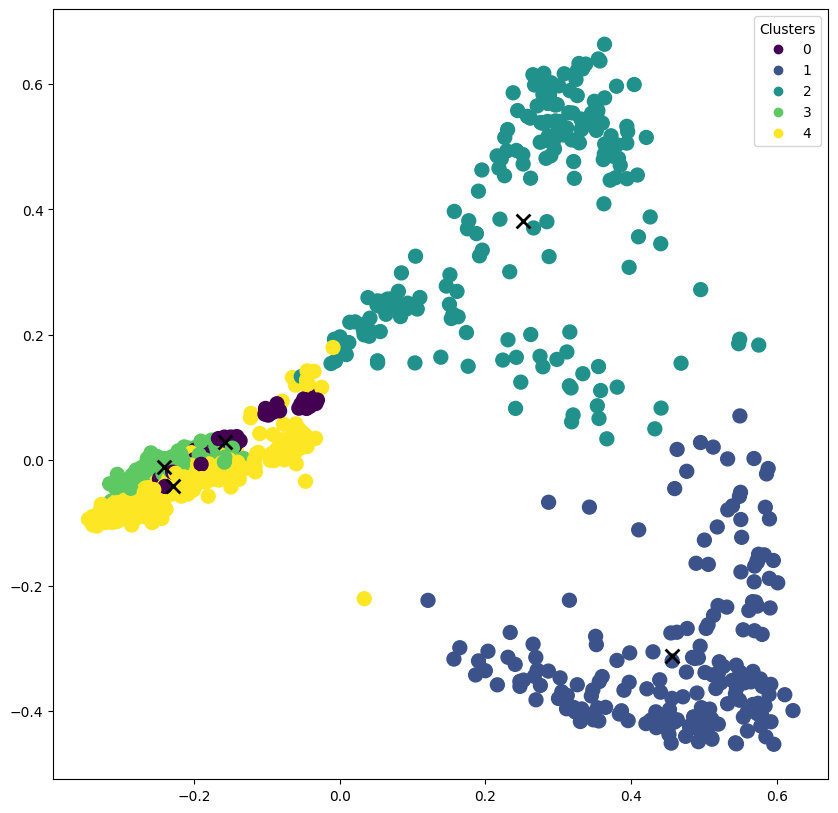

In [29]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

Le clustering ci-dessus regroupe les données en clusters les plus homogènes possibles ainsi que la technique k-means utilisé aide à regrouper itérativement les données autour de centres k (x). On peut dire que les résultats obtenus font sens car les trois couleurs sont assez séparés.

# Word Embeddings : le modèle Word2Vec

### Imports

In [30]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

### Chargement et traitement des phrases du corpus

### Création d'un objet qui *streame* les lignes d'un fichier pour économiser de la RAM

In [31]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [32]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)

sentences = [sentence for sentence in sentences]

### Détection des bigrams

In [33]:
bigram_phrases = Phrases(sentences)

In [34]:
type(bigram_phrases.vocab)

dict

In [35]:
#Visualisation du nombre de termes clé observés dans le corpus
len(bigram_phrases.vocab.keys())

15850647

In [36]:
# Prenons une clé au hasard
key_ = list(bigram_phrases.vocab.keys())[144]
print(key_)

1q


In [37]:
#Le dictionnaire indique le score de cette coocurrence :
bigram_phrases.vocab[key_]

488

In [38]:
#Lorsque l'instance de `Phrases` a été entraînée, elle peut concaténer les bigrams dans les phrases lorsque c'est pertinent.
%time bigram_phrases[sentences[78]]

CPU times: total: 0 ns
Wall time: 0 ns


['du',
 '-',
 '#',
 'val',
 ',',
 'receveur',
 'des',
 'contributions_directes',
 'et',
 'des',
 'accises',
 'a',
 'deynze',
 '.',
 'est',
 'admis',
 ',',
 'sur',
 'sa',
 'demande',
 ',',
 'a',
 'faire_valoir',
 'ses_droits',
 'a',
 'la',
 'pension',
 'de',
 'retraite',
 '.']

### Conversion des `Phrases` en objet `Phraser`

In [39]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

Le `Phraser` est un objet qui convertit certains unigrams d'une liste en bigrams lorsqu'ils ont été identifiés comme pertinents.

In [40]:
%time bigram_phraser[sentences[78]]

CPU times: total: 0 ns
Wall time: 0 ns


['du',
 '-',
 '#',
 'val',
 ',',
 'receveur',
 'des',
 'contributions_directes',
 'et',
 'des',
 'accises',
 'a',
 'deynze',
 '.',
 'est',
 'admis',
 ',',
 'sur',
 'sa',
 'demande',
 ',',
 'a',
 'faire_valoir',
 'ses_droits',
 'a',
 'la',
 'pension',
 'de',
 'retraite',
 '.']

### Extraction des trigrams

Nous répétons l'opération en envoyant cette fois la liste de bigrams afin d'extraire les trigrams.

In [41]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [42]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

### Création d'un corpus d'unigrams, bigrams, trigram

In [43]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [44]:
print(corpus[:100])

[['mi', 'imnri', 'r', 'i', '<<', 'i', 'i', 'hmu', "'", 'i', '/', 'tx', "-'", 'l', ':', 'marche', 'tenu', 'hors', 'villa', ',', 'la', '9', '.'], ['--', 'u', 'a', 'ete', 'vaain', 'si', 'teicj', '>>', 'm', 'races_indigenes', 'de', 'fr', '.'], ['31', '<)', 'a', '5s', "'", 'k', '131', 'de', '.'], ['rasa', 'iichakdui', "'", 'te', ',', 'do', '(', 'r', '.', '3s0', 'h', '710', '.', 'taureaux', 'iallsenas', ',>', 'ia', 'u', '\\', '--', 'a', '--', ';', '0ii', '.'], ['hollandais', ',', 'dufr', '.'], ['0', '.'], ['--', 'a', '9', '.--', 'la', 'idto', '-', 'vachei', 'laitieres', ':', 'bn', 'vante', '1q', '.'], ['vendues', '3', '\\', 'au', 'prix', 'la', '410', 'a', '*', '<<', 'i', 'h', '\\;', 'genisses', ',', 'kl', '.'], ["'.", '9', '.'], ['i', 'l', '.', '2', 'i', '.', 'id', '.'], ['da', '370', 'i', '6lutr', '.'], ['marche', 'a', '<', 'u', 'porcs', '.'], ['--', 'categorie', 'de', 'lt', 'ilashtya', ':', "'", '237', 'on', 'vente', ';', 'vendus', '1', 'm', '.', 'do', "'", '2', 'i', '.--', 'a', ';:,', 'l'

## Entrainement d'un modèle Word2Vec sur ce corpus

In [45]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descende de gradient, aka. epochs.
)

CPU times: total: 30min 56s
Wall time: 9min 36s


#### Remarque

Vous voyez ici que l'entrainement du modèle est parallélisé (sur 4 workers).

Lors qu'on parallélise l'entrainement du modèle, 4 modèles "séparés" sont entrainés sur environ un quart des phrases.

Ensuite, les résultats sont agrégés pour ne plus faire qu'un seul modèle.

On ne peut prédire quel worker aura quelle phrase, car il y a des aléas lors de la parallélisation (p. ex. un worker qui serait plus lent, etc.).

Sur ce, les valeurs peuvent varier légèrement d'un entrainement à l'autre.

Mais, globalement, les résultats restent cohérents.

### Sauver le modèle dans un fichier

In [46]:
outfile = f"../data/bulletins.model"
model.save(outfile)

## Exploration du modèle en utilisant les deux fonctions `similarity` et `most_similar`

### Charger le modèle en mémoire

In [47]:
model = Word2Vec.load("../data/bulletins.model")

### Imprimer le vecteur d'un terme

In [48]:
model.wv["bruxelles"]

array([-5.8715229e+00, -2.9808903e+00, -6.1699214e+00,  4.5281591e+00,
        1.5345638e+00, -3.1242764e+00, -4.2863688e+00, -8.7926960e-01,
       -1.1167887e+00,  5.3856091e+00, -3.1921077e+00,  3.7677820e+00,
        2.0432642e+00,  3.9716578e+00, -2.9374189e+00, -8.9151889e-01,
       -3.5006463e-04, -1.9817017e+00, -2.8487530e+00, -2.6870008e+00,
        3.9478797e-01, -1.8944421e+00, -1.2166504e+00, -1.8101209e+00,
       -1.5955392e-01, -2.9020500e+00, -3.5479770e+00,  5.1357388e+00,
        3.8240702e+00, -1.2874062e+00, -2.9533297e-01, -1.6015701e+00],
      dtype=float32)

### Calculer la similarité entre deux termes avec `similarity`

In [49]:
model.wv.similarity("hospice", "hopital")

0.7545998

In [50]:
model.wv.similarity("etablissement", "retablissement")

0.70756555

In [51]:
model.wv.similarity("metres", "mettre")

0.085744776

In [52]:
model.wv.similarity("suffire", "souffrir")

0.7811823

In [53]:
model.wv.similarity("valoir", "falloir")

0.3750158

In [54]:
model.wv.similarity("entreprendre", "entreprise")

0.619509

### Chercher les mots les plus proches d'un terme donné avec `most-similar`

In [55]:
model.wv.most_similar("bruxelles", topn=10)

[('bru_xelles', 0.869769275188446),
 ('bruxolles', 0.8635097742080688),
 ('bruxeues', 0.8461683988571167),
 ('bruxellee', 0.7945007085800171),
 ('brnxelles', 0.787849485874176),
 ('bruxellos', 0.7805812954902649),
 ('bruxeiles', 0.7644994854927063),
 ('bruxelle', 0.756931722164154),
 ('bruxellea', 0.7543774247169495),
 ('louvain', 0.7410650849342346)]

In [56]:
model.wv.most_similar("public", topn=10)

[('public_bruxellois', 0.850452721118927),
 ('peuple_allemand', 0.8254539966583252),
 ('peuple_belge', 0.8222545981407166),
 ('pretexte', 0.8215112090110779),
 ('legislateur', 0.8200145959854126),
 ('monde_entier', 0.8144017457962036),
 ('kremlin', 0.8140304088592529),
 ('ceremonial', 0.8102176189422607),
 ('premier_plan', 0.8076150417327881),
 ('peuple_americain', 0.8008378148078918)]

In [57]:
model.wv.most_similar("commune", topn=10)

[('maison_communale', 0.7892730832099915),
 ('propriete_industrielle', 0.7268527746200562),
 ('rixe', 0.7228336334228516),
 ('propriete', 0.7196053862571716),
 ('belle_propriete', 0.7146837115287781),
 ('location_publique', 0.713904619216919),
 ('vaste_propriete', 0.7107706069946289),
 ('place_communale', 0.7054402828216553),
 ('curieuse_lettre', 0.6992093920707703),
 ('crypte', 0.6899868845939636)]

In [58]:
model.wv.most_similar("hopital", topn=10)

[('hopital_civil', 0.9137763381004333),
 ('infirmerie', 0.9116771817207336),
 ('hopital_militaire', 0.8838120698928833),
 ('ho_pital', 0.8507239818572998),
 ('hopital_brugmann', 0.821505606174469),
 ('amigo', 0.8164184093475342),
 ('ambulance', 0.8005029559135437),
 ('hopital_communal', 0.7954905033111572),
 ('institut_medico', 0.7908585071563721),
 ('aerodrome', 0.7788134217262268)]

### Faire des recherches complexes à travers l'espace vectoriel

In [59]:
print(model.wv.most_similar(positive=['bruxelles', 'france'], negative=['belgique']))

[('bruxolles', 0.832273006439209), ('bru_xelles', 0.8270699381828308), ('jerusalem', 0.793605387210846), ('bruxeues', 0.7884555459022522), ('bruxellee', 0.7728294134140015), ('anciennement', 0.7582023739814758), ('louvain', 0.7499675750732422), ('laeken', 0.7460979223251343), ('robert_finck', 0.7370668053627014), ('cureghem', 0.7314031720161438)]
